<h1>Laboration 2 (GST2CL)</h1>

In [13]:
setwd('C:/Users/Phili/OneDrive/Högskolan/Årskurs 2/Statistisk analys - GST2CL/Laborationer/Laboration 2/')
getwd()

[1] "C:/Users/Phili/OneDrive/Högskolan/Årskurs 2/Statistisk analys - GST2CL/Laborationer/Laboration 2"

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>1 Konfidensintervall och test</h2>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>1.1 Konfidensintervall för väntevärden</h2>

<h3>1.1.1 Normalfördelning (σ är känd)</h3>

<p><b>Exempel:</b> Ett företag observerar antalet inkommande e-mail på 8 slumpmässigt 
valde dagar. Resultatet blev 141, 150, 163, 139, 175, 174, 173 och 135 e-mail. 
Av erfarenhet vet man att antalet inkommande mail per dag är en 
approximativt normalfördelad variabel med standardavvikelsen 17. Beräkna ett 
95% konfidensintervall för sanna medelvärdet för antalet inkommande mail.</p>

In [8]:
n <- 8
stickprov_1 <- c(141, 150, 163, 139, 175, 174, 173, 135)
sigma <- 17
stickprov_1_mean <- mean(stickprov_1)
alpha_half <- qnorm(0.975)
me <- alpha_half * (sigma/sqrt(n))
stickprov_1_mean - me # lägre/vänstra gränsen
stickprov_1_mean + me # högre/högra gränsen

[1] 144.4698

[1] 168.0302

<b>Svar:</b> [144.46981 , 168.03018]

<h3>1.1.2 Normalfördelning (σ är okänd)</h3>

<b>Exempel:</b> Ur en sjö har man tagit 8 vattenprover och mätt pH-värdena i dessa. Mata in 
data för hand och lagra i en vektor kallad stickprov2: 

In [24]:
stickprov2 <- c(7.3,7.5,6.8,7.1,6.9,7.2,7.0,6.5)

Gör ett antagande om normalfördelning. Med datorns hjälp är det enkelt att göra  en 
snabb kontroll av rimligheten om normal fördelning, rita helt enkelt ett histogram och 
se efter om det åtminstone indikerar en symmetrisk spridning (men det kan vara svårt 
att bedöma med så pass få observationer):

In [4]:
hist(stickprov2)

ERROR: Error in hist(stickprov2): object 'stickprov2' not found


Vi ska nu med hjälp av några få kommandon i R skapa ett 95% konfidensintervall för 
det  genomsnittliga  pH-värdet.  Standardavvikelse  är  okänd.
Det finns två sätt att numeriskt angripa detta: 
1) Skriv in intervallet ovan manuellt 
2) Använd en färdig rutin (vid namn t.test) 

In [30]:
# Alternativ 1
mv <- mean(stickprov2)  
stad <- sd(stickprov2)  
n <- 8 
tfaktor <- qt(0.975, n-1)  
mv - tfaktor*stad/sqrt(n)  
mv + tfaktor*stad/sqrt(n) 

[1] 6.777171

[1] 7.297829

In [32]:
# Alternativ 2
t.test(stickprov2)


	One Sample t-test

data:  stickprov2
t = 63.923, df = 7, p-value = 6.024e-11
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.777171 7.297829
sample estimates:
mean of x 
   7.0375 


<h2>1.2 Konfidensintervall för väntevärdesskillnad</h2>

Tryckhållfastheten  för  två  olika  betongblandningar,  av  typen  M20  respektive  M25  ska 
jämföras. Räkna  ut  medelvärde  för  respektive  datamaterial  och  rita  lådagram  med 
boxplot  för  att  undersöka  om  det  verkar  finnas  någon  skillnad  mellan  väntevärdet 
(μM20 respektive μM25) för tryckhållfastheten för de två blandningarna. 

In [10]:
M20<-c(35.50,  27.80,  35.80,  30.10,  27.60,  32.45,  30.20, 26.85, 
31.10,  19.20,  25.86,  31.20,  25.60,  31.15,  35.80, 27.50, 
28.73,  23.20,  18.95,  24.50,  22.45,  29.80,  35.65, 30.80, 
24.01,  25.25,  27.55,  30.15,  24.50,  22.60)    
         
M25<-c(31.20,  35.86,  31.00,  39.01,  35.60,  38.00,  29.68, 27.26, 
30.88,  35.50,  28.88,  38.50,  27.60,  26.00,  37.10, 30.80, 
34.45,  38.00,  33.51,  35.80,  31.20,  36.52,  29.82, 37.80, 
35.01,  36.60,  32.25,  31.50,  28.65,  27.55)

Ett 99 % konfidensintervall för väntevärdesskillnaden μM25 − μM20 ges av:

[1] 28.06167

[1] 33.051


	Welch Two Sample t-test

data:  M25 and M20
t = 4.5385, df = 56.408, p-value = 3.017e-05
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 2.058677 7.919989
sample estimates:
mean of x mean of y 
 33.05100  28.06167 


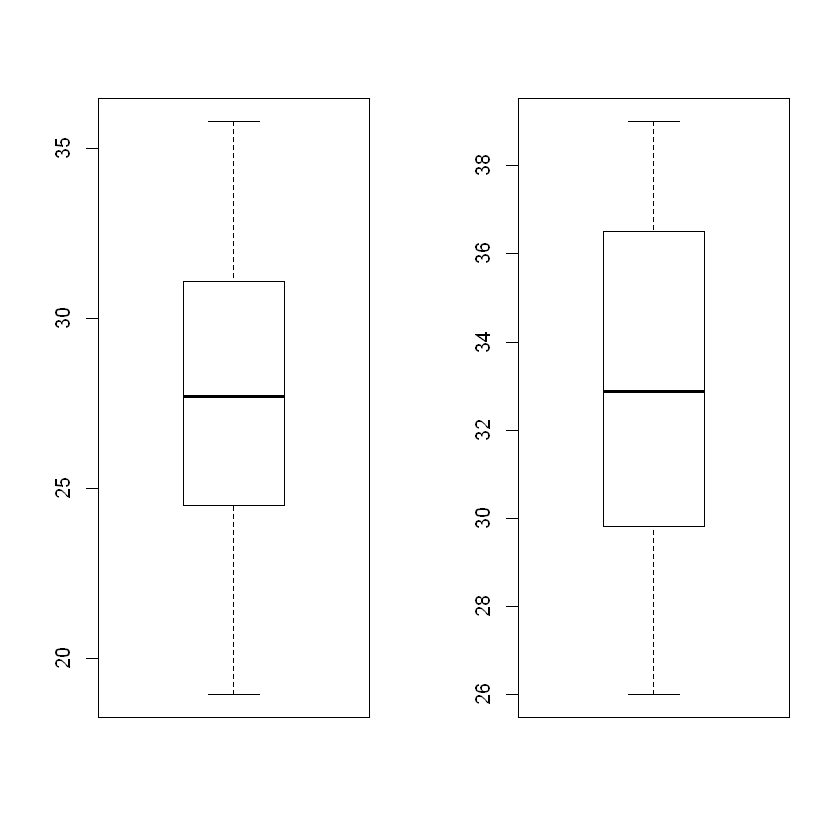

In [11]:
mean(M20) 
mean(M25) 
par(mfrow=c(1,2))  
boxplot(M20) 
boxplot(M25) 
t.test (M25,M20, conf.level=0.99)

<h2>1.3 Konfidensintervall för andel</h2>

<b>Exempel:</b> I en by, ett slumpmässigt urval om 1000 av dessa tillfrågas om sina 
partisympatier, och 520 av dessa angav att de var moderater. Ange ett 95% 
konfidensintervall för den sanna andelen moderater i byn.

In [30]:
# Alternativ 1: prop.test() från paketet stats 
x <- 520 
n <- 1000  
prop.test(x, n, conf.level=0.95, correct = FALSE)  
# du kan skriva värde av x and n direkt


	1-sample proportions test without continuity correction

data:  x out of n, null probability 0.5
X-squared = 1.6, df = 1, p-value = 0.2059
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.4890177 0.5508292
sample estimates:
   p 
0.52 


<h2>1.4 Konfidensintervall för andelsskillnad</h2>

<b>Exempel:</b>  Var  det  rätt  låt  som  vann?  Denna  för  hela  nationen  så  viktiga  fråga  ställdes  av  en 
kvällstidning till ett slumpmässigt urval om 400 män och 600 kvinnor dagen efter den svenska 
uttagningen  till  Melodifestivalen.  Bland  männen  var  det  202  och  bland  kvinnorna  334  som 
svarade Ja. 
Uppskatta  skillnaden  mellan  männen  och  kvinnorna  i  hela  nationen  vad  gäller  andelen  Ja-
svarare med ett intervall med konfidensgraden 95%. 

In [29]:
x <- c (202, 334) 
n <- c (400, 600) 
prop.test(x, n, conf.level=0.95, correct = FALSE) 


	2-sample test for equality of proportions without continuity
	correction

data:  x out of n
X-squared = 2.576, df = 1, p-value = 0.1085
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.11475962  0.01142629
sample estimates:
   prop 1    prop 2 
0.5050000 0.5566667 


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>2 R för att beräkna sannolikheter</h2> 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Vi kan använda R för att beräkna P(X≤x) för dem flesta fördelningsfunktioner.  
Normal fördelning: 
Om X∼N(mean,sd), vi får P(X≤x) med funktionen pnorm(x,mean,sd).  
?pnorm() 
 
P(x < x1) = pnorm(x1, mean = μ, sd = σ, lower.tail=TRUE)  
P(x > x2) = pnorm(x2, mean = μ, sd = σ, lower.tail=FALSE)  
P(x2 < x < x1) = pnorm(x1, mean = μ, sd = σ, lower.tail=TRUE) - pnorm(x2, mean = μ, 
sd = σ, lower.tail=TRUE) 

<h3>2.1 Beräkna P(X≤1) om X∼N(1,1)</h3>

In [33]:
pnorm (1, mean=1, sd=1)

[1] 0.5

<h3>2.2  Beräkna P(0.5≤X≤2) om X följer normalfördelning med väntevärde = 5, 
standardavvikelse = 2?</h3>

In [35]:
pnorm(2, 5, 2, lower.tail=TRUE) - pnorm(0.5, 5, 2, lower.tail=TRUE)

[1] 0.05458273

<h3>2.3  Beräkna P(X > 19) om X ∼ (17.46, 375.67)?</h3>

In [36]:
pnorm(19, 17.46, sqrt(375.67), lower.tail=FALSE) 
 
# eller pga. normal fördelning är symmetrisk, vi kan köra alternative 
# P(X > 19) = 1- P(X≤ 19) 
1 - pnorm(19, mean=17.46, sd=sqrt(375.67))

[1] 0.4683356

[1] 0.4683356

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>3 χ2-test</h2>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Vid ett korsningsförsök med en viss blomma förekommer färgerna lila, röd och vit. Enligt en genetisk teori 
som  bygger  på  vissa antaganden ska färgerna  förekomma  i  proportionerna 27 : 9 : 28. Detta medför 
att:
<br>
p1 = P(lilafärgad blomma) = 27 / (27 + 9 + 28) = 27/64
<br>
och analogt gäller p2 = 9/64 och p3 = 28/64 för röd resp. vit avkomma.
<br>
Se formel i labbinstruktioner.

In [1]:
blomfarg  <-c(158,19,123); 
 ph0 <-c(27/64,9/64,28/64); 
chisq.test(blomfarg, p=ph0) 


	Chi-squared test for given probabilities

data:  blomfarg
X-squared = 21.072, df = 2, p-value = 2.656e-05


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>4 Läs in/Importera data </h2>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# TXT
#importera filen Table.txt 
Tdata<- read.table("Table.txt")

# CSV
#importera filen esoph.csv 
Cdata<- read.csv("esoph.csv", header = FALSE, sep = ",")

# EXCEL
install.packages("readxl") 
library("readxl") 
Edata1<- read_excel("Adata.xls", sheet = 1) 
#OR  
Edata1<-  read.xlsx("Adata.xls",1)